# Data visualization

Here I want to visualize the 3D distribution of the data looking at 3 features at a time.

In [1]:
# LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

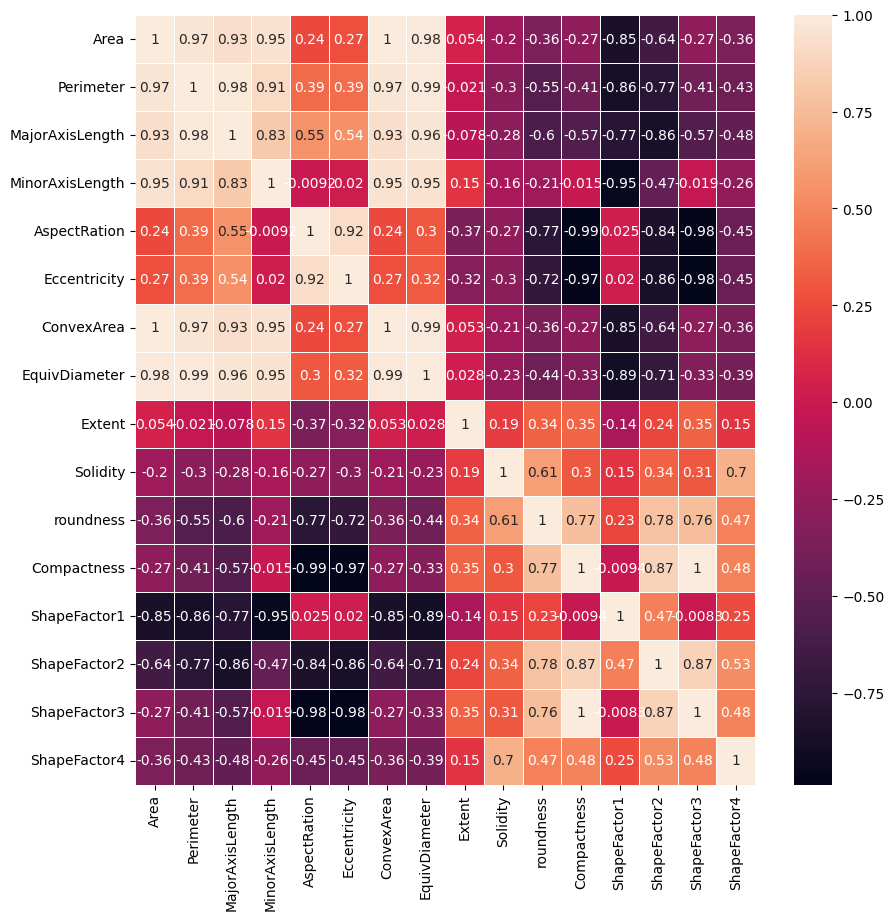

In [4]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax);

### COMMENT

Looking at the correlation matrix it seems there are no triplets of features which are all uncorrelated from each others.

In [5]:
def feature_analysis2D(df, features):
    
    sub_df = df[features]
    temp_df = pd.concat([sub_df, df[['Class']]], axis = 1)

    fig, ax = plt.subplots(figsize=(6,6))
    corr = sns.heatmap(temp_df.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);

    # DATA VISUALIZATION in 2D

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(features[0], fontsize = 15)
    ax.set_ylabel(features[1], fontsize = 15)
    ax.set_title('2 features analysis', fontsize = 20)

    labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for label, color in zip(labels,colors):
        indicesToKeep = temp_df['Class'] == label
        ax.scatter(temp_df.loc[indicesToKeep, features[0]]
                , temp_df.loc[indicesToKeep, features[1]]
                , c = color
                , s = 10)

    ax.legend(labels)
    ax.grid()
    

In [6]:
def feature_analysis3D(df, features):
    
    sub_df = df[features]
    temp_df = pd.concat([sub_df, df[['Class']]], axis = 1)

    fig, ax = plt.subplots(figsize=(6,6))
    corr = sns.heatmap(temp_df.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);

    # DATA VISUALIZATION in 3D
        
    fig = plt.figure(dpi=120, figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d') 
    ax.set_xlabel(features[0], fontsize = 15)
    ax.set_ylabel(features[1], fontsize = 15)
    ax.set_zlabel(features[2], fontsize = 15)
    # ax.set_tick(fontsize=5)
    ax.set_title('3 features analysis', fontsize = 15)

    labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for label, color in zip(labels,colors):
        indicesToKeep = temp_df['Class'] == label
        ax.scatter(temp_df.loc[indicesToKeep, features[0]]
                , temp_df.loc[indicesToKeep, features[1]]
                , temp_df.loc[indicesToKeep, features[2]]
                , c = color
                , s = 5)

    ax.legend(labels, fontsize = 10, loc=0)
    ax.grid()

In [7]:
# # SCALING 1
# from sklearn.preprocessing import MinMaxScaler
 
# mmscaler = MinMaxScaler()
# features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 
#             'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4']

# df[features] = mmscaler.fit_transform(df[features])

# SCALING 2
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 
            'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4']
  
df[features] = sc.fit_transform(df[features])

## 3D Feature Analysis

In [8]:
%matplotlib widget

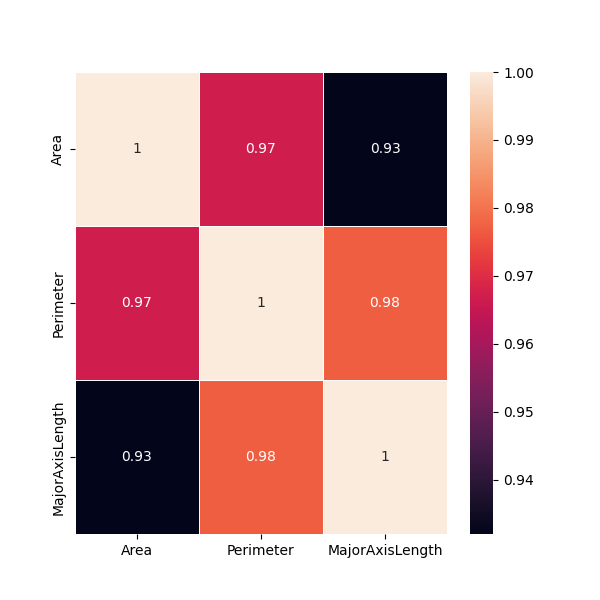

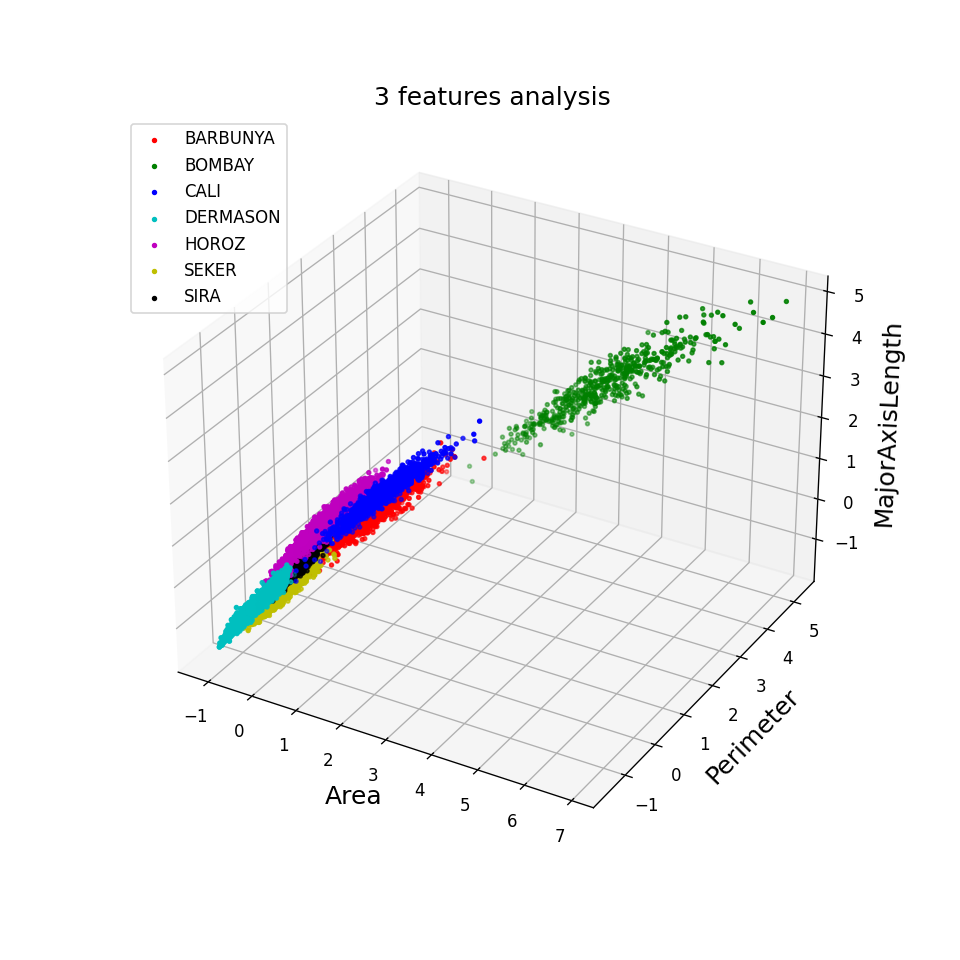

In [9]:
# Choose 3 attributes to look at

features = ["Area", "Perimeter", "MajorAxisLength"]
feature_analysis3D(df, features)

In [ ]:
# Choose 3 attributes to look at

features = ["Area", "Perimeter", "MinorAxisLength"]
feature_analysis3D(df, features)

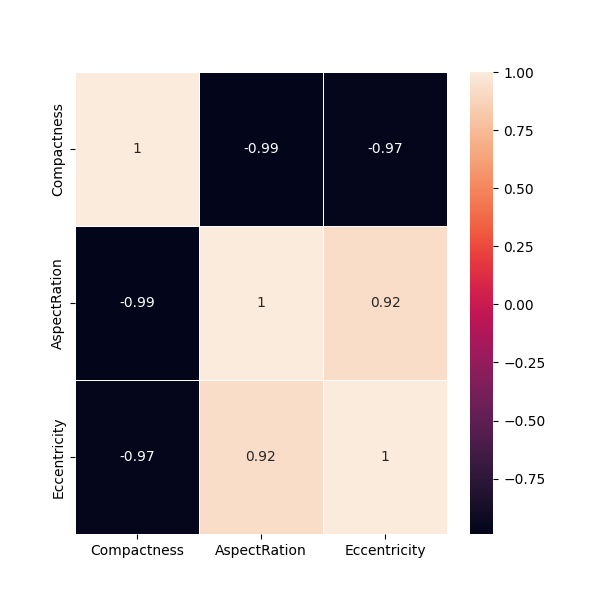

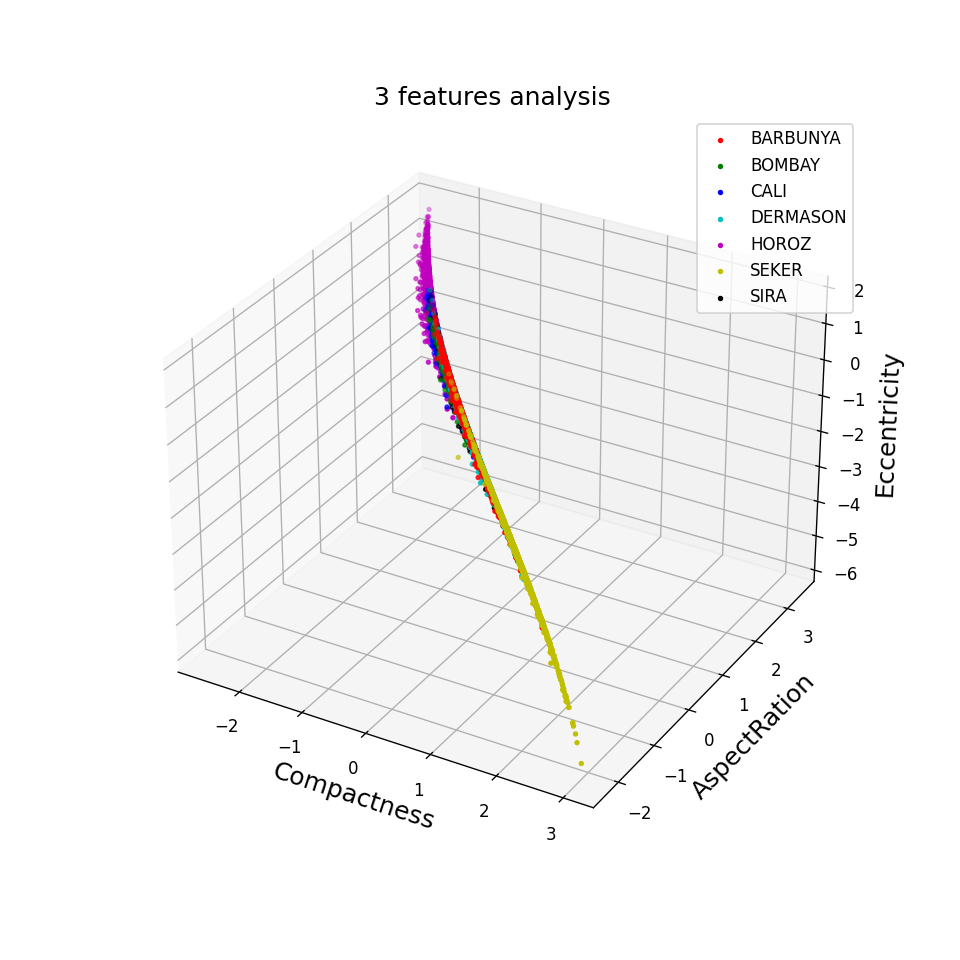

In [10]:
# Choose 3 attributes to look at

features = ["Compactness", "AspectRation", "Eccentricity"]
feature_analysis3D(df, features)

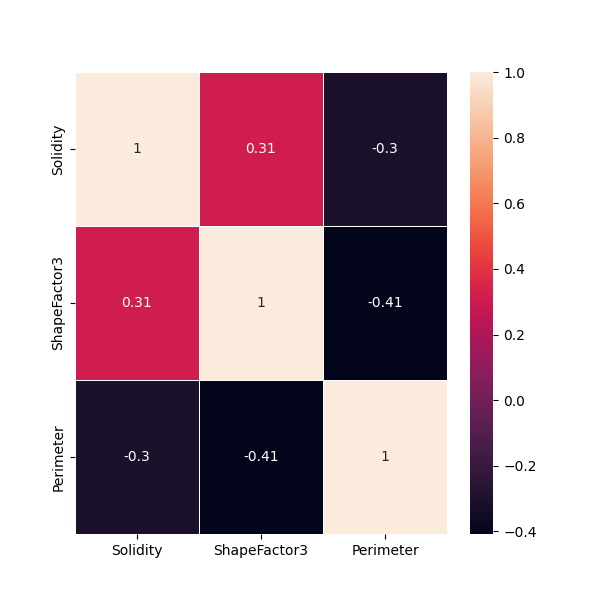

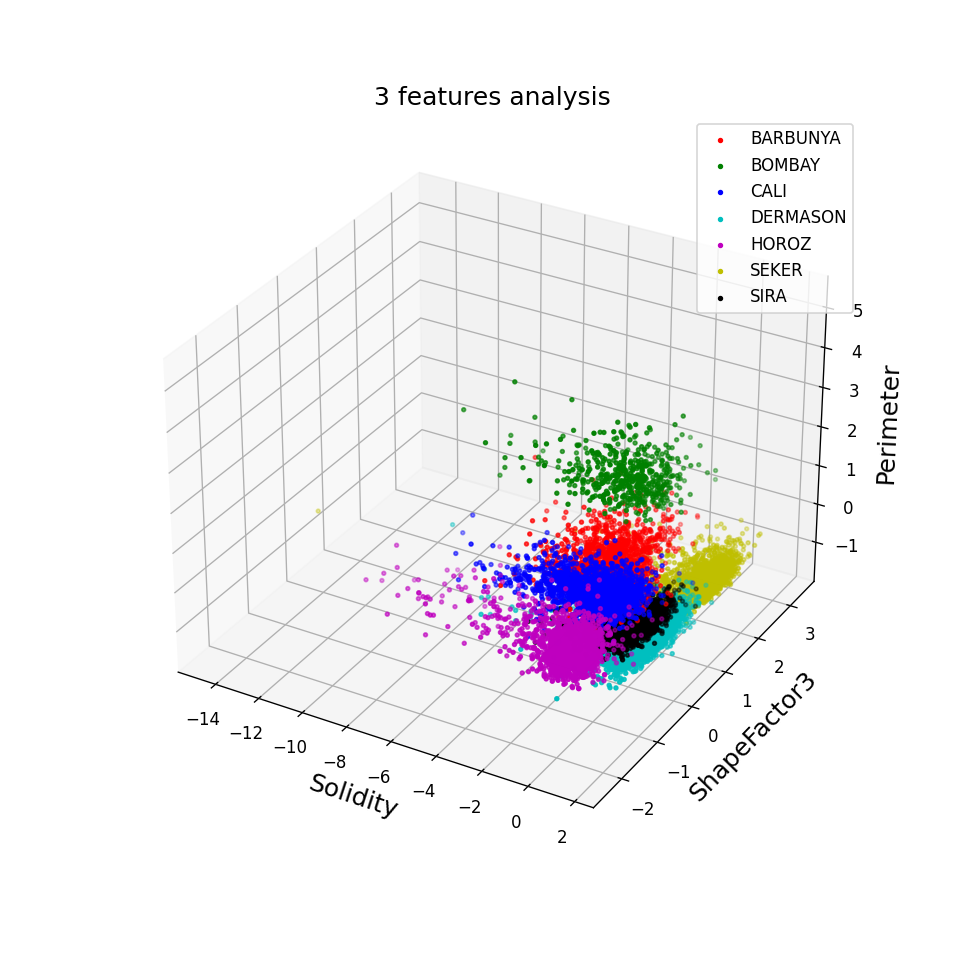

In [11]:
# Choose 3 attributes to look at

features = ["Solidity", "ShapeFactor3", "Perimeter"]
feature_analysis3D(df, features)

# 2D Feature Analysis

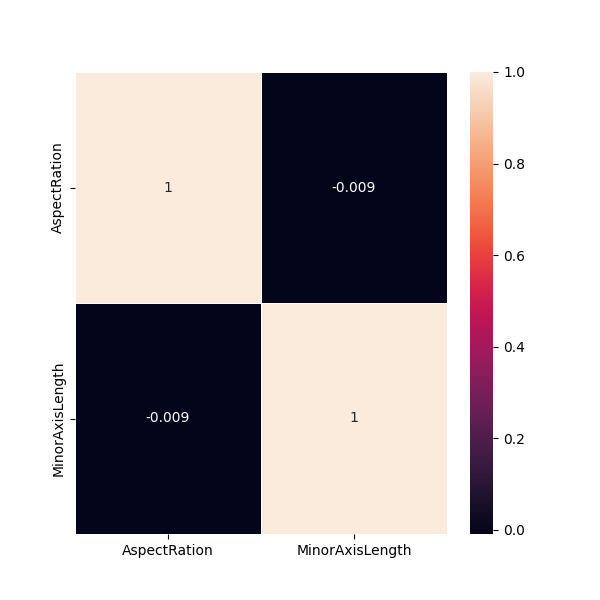

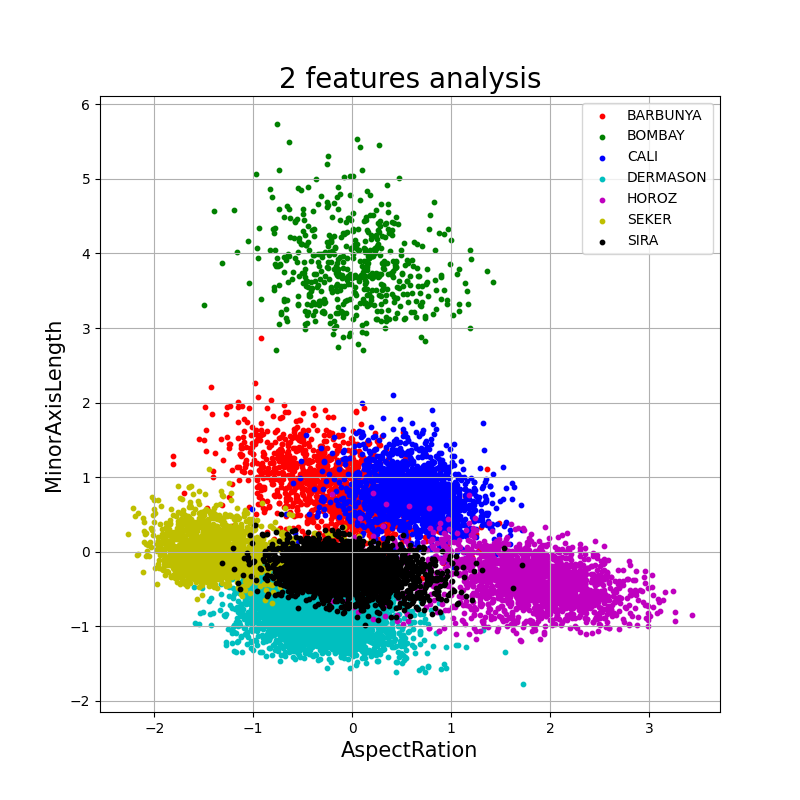

In [10]:
# Choose 2 attributes to look at

features = ["AspectRation", "MinorAxisLength"]
feature_analysis2D(df, features)

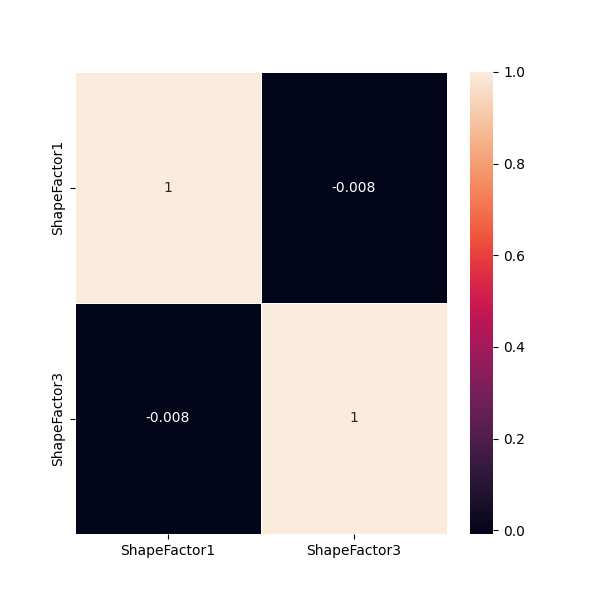

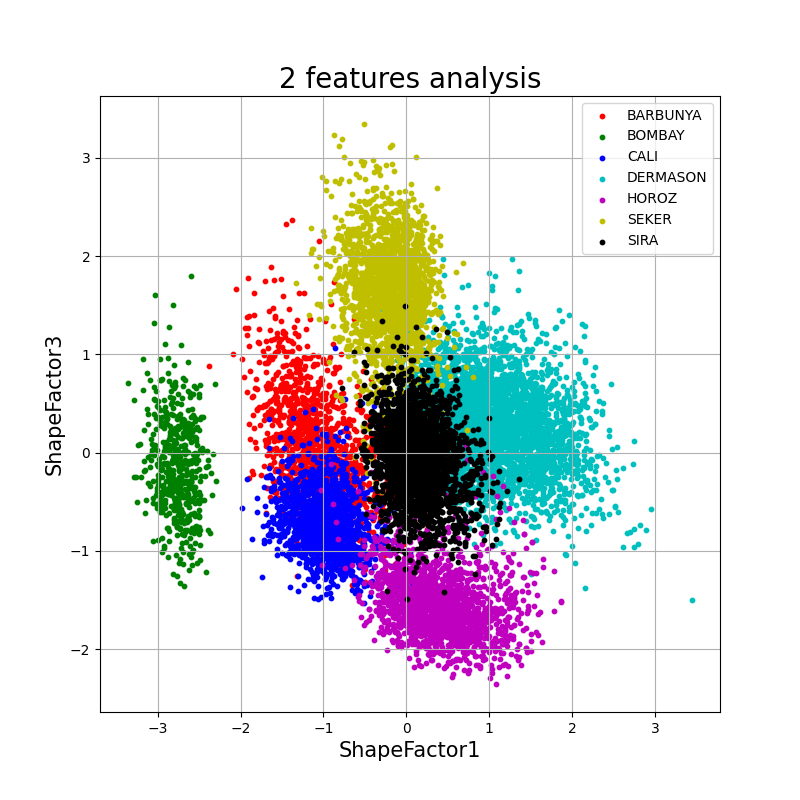

In [11]:
# Choose 2 attributes to look at

features = ["ShapeFactor1", "ShapeFactor3"]
feature_analysis2D(df, features)